# Testing confidence intervals
Author: Aleksander Filip Żarnecki (University of Warsaw)

### (0) Import libraries 

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import norm

### (1) Definition of probability intervals for assumed probability density function

Assuming gaussian probability distribution with variable sigma

In [2]:
# Variable pdf width!!!
# Absolute precision better for small than for large energy

def sigma(mean):
    sig = np.sqrt(1.+0.1*mean*mean)
    return sig

# Return value of x corresponsing to upper (one-side) limit on given CL
# Use 1-CL for lower limit

def problim(mean,cl):
    
# Use inverse survival function from scipy (inverse of 1 - cumulative distribution)

    xlim = norm.isf(1-cl)

    return mean+xlim*sigma(mean) 

# Check the confidence level for upper limit

def clulim(xm,ml):

    dx = (xm-ml)/sigma(ml)

    return norm.sf(dx)   # Survival function

In [3]:
# Bayesian limit

def bayeslim(xm,cl):
    
    sigm = sigma(xm)
    
    # numerical integration settings
    
    mmin = 0             # True value constrained to be positive
    mmax = xm+5*sigm
    mbin = 2000
    
    dm = (mmax-mmin)/mbin
    mval = np.linspace(mmin+dm/2,mmax-dm/2,mbin)
    sval = sigma(mval)
    dp = dm*norm.pdf(xm,mval,sval)
    
    pint = np.sum(dp)
    
    psum = 0
    mlim = mmin
    
    for im in range(mbin):
        psum+=dp[im]/pint
        if(psum>cl):
            mlim = mval[im]-dm/2
            break
#        print(mval[im],sval[im],dp[im],psum)  # Debug output
    
    return mlim


### (2) Define set of hypothesis

In [4]:
# Considered values of true mean

# vmean = np.linspace(0.,6.0,13)
vmean = np.linspace(0.,6.0,121)
# vmean = np.linspace(0.,6.0,601)

CL = 0.95            # One sided! So the central inteval will be 90% CL

# Upper an lower edges of x probability intervals

vhig = problim(vmean,CL)
vlow = problim(vmean,1-CL)

# Values of measured x (for Bayesian curve)

vmeas = np.linspace(-2.,4.,61)

vbay = np.empty(vmeas.size)

for im in range(vmeas.size):
    vbay[im] = bayeslim(vmeas[im],CL)

vbcl = clulim(vmeas,vbay)

### (3)  Print interval information

In [5]:
print("\nUpper Bayes limit for mu:")

print("\n  Measured x    mu_ul      CL")

for im in range(vmeas.size) :
    print ("%10.3f   %8.3f    %8.3f " % (vmeas[im],vbay[im],vbcl[im]))



Upper Bayes limit for mu:

  Measured x    mu_ul      CL
    -2.000      1.729       0.999 
    -1.900      1.764       0.999 
    -1.800      1.799       0.999 
    -1.700      1.837       0.999 
    -1.600      1.878       0.999 
    -1.500      1.920       0.998 
    -1.400      1.967       0.998 
    -1.300      2.014       0.997 
    -1.200      2.064       0.997 
    -1.100      2.118       0.996 
    -1.000      2.175       0.996 
    -0.900      2.233       0.995 
    -0.800      2.296       0.994 
    -0.700      2.361       0.993 
    -0.600      2.431       0.992 
    -0.500      2.502       0.991 
    -0.400      2.580       0.990 
    -0.300      2.659       0.988 
    -0.200      2.744       0.987 
    -0.100      2.831       0.986 
     0.000      2.922       0.984 
     0.100      3.021       0.983 
     0.200      3.121       0.981 
     0.300      3.225       0.980 
     0.400      3.335       0.978 
     0.500      3.449       0.977 
     0.600      3.567       0.97

### (4) Draw probability intervals

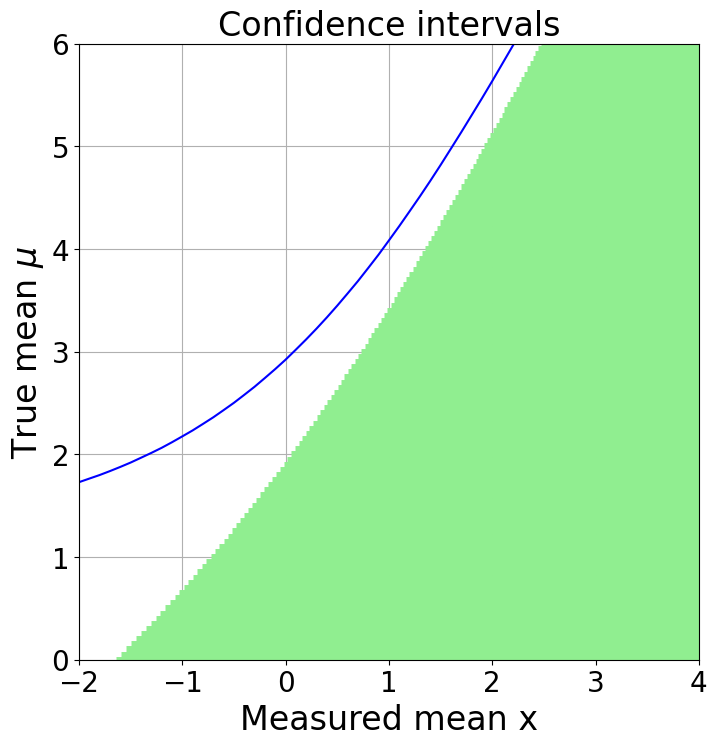

In [6]:
# Plot ranges

Xmin=-2
Xmax=4
Ymin=0
Ymax=6


plt.figure(figsize=(8, 8))

plt.hlines(vmean,vlow,Xmax,color='lightgreen',linewidth=5)

plt.plot(vmeas,vbay,'-',color='blue')

plt.title("Confidence intervals",size=24)
plt.xlabel("Measured mean x",size=24)
plt.ylabel("True mean $\\mu$",size=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim([Xmin,Xmax])
plt.ylim([Ymin,Ymax])
plt.grid(which='major', axis='both')

fname = '07_gauss_bayes2.png'
plt.savefig(fname)


### (5) Hypothetical measurement

In [7]:
Xm = -1.8

# Look for limit point in the probability interval tables

iul = np.argmax(Xm < vmeas)

# Interpolate between points for higher precision (linear interpolation)

frac = (Xm-vmeas[iul-1])/(vmeas[iul]-vmeas[iul-1])
ul=frac*vbay[iul]+(1-frac)*vbay[iul-1]
print('Upper limit : %.4f' % (ul))


Upper limit : 1.7987


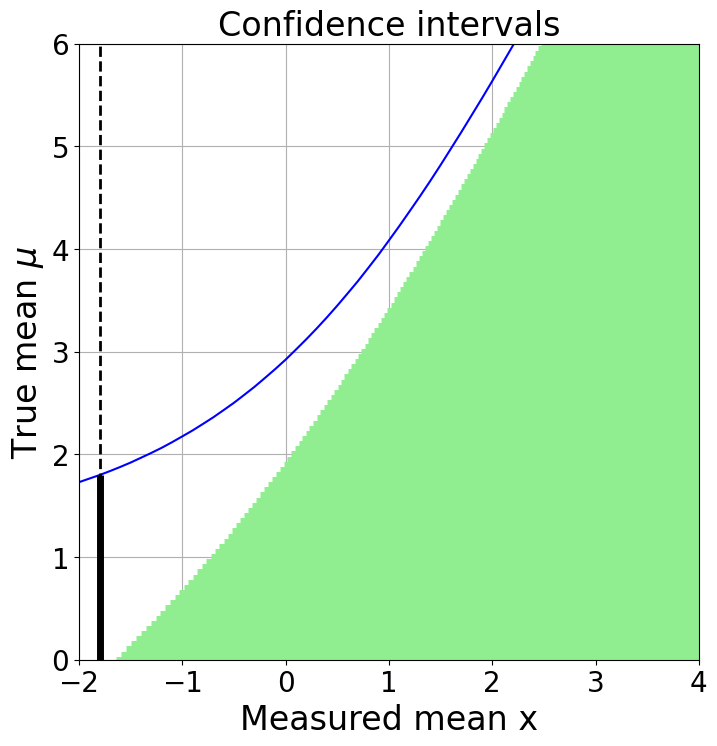

In [8]:
# Plot ranges

Xmin=-2
Xmax=4
Ymin=0
Ymax=6


plt.figure(figsize=(8, 8))

plt.hlines(vmean,vlow,Xmax,color='lightgreen',linewidth=5)

plt.plot(vmeas,vbay,'-',color='blue')

plt.title("Confidence intervals",size=24)
plt.xlabel("Measured mean x",size=24)
plt.ylabel("True mean $\\mu$",size=24)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlim([Xmin,Xmax])
plt.ylim([Ymin,Ymax])
plt.grid(which='major', axis='both')

plt.vlines(Xm,Ymin,Ymax,color='black',linewidth=2,linestyles='dashed')
plt.vlines(Xm,Ymin,ul,color='black',linewidth=5,linestyles='solid')

fname = '07_gauss_bayes2_2.png'
plt.savefig(fname)
